In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [325]:
df = pd.read_csv('train.csv')

In [326]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### treating null values

In [328]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [329]:
df['Cabin'].fillna(value='', inplace=True)

In [330]:
df.dropna(inplace=True)

In [331]:
len(df)

889

In [332]:
# combining 'SibSp' and 'Parch' columns and dropping these columns
df['relatives'] = df['SibSp'] + df['Parch']

In [333]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [334]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,relatives
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,,S,0


In [335]:
#dropping the following columns as they are not useful in the analysis:
#PassengerId, Name, Ticket, Cabin

In [336]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [337]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Pclass     889 non-null    int64  
 2   Sex        889 non-null    object 
 3   Age        889 non-null    float64
 4   Fare       889 non-null    float64
 5   Embarked   889 non-null    object 
 6   relatives  889 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 55.6+ KB


In [339]:
# label encoding the categorical variables

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   Fare        889 non-null    float64
 4   relatives   889 non-null    int64  
 5   Sex_male    889 non-null    uint8  
 6   Embarked_Q  889 non-null    uint8  
 7   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.3 KB


In [341]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [342]:
X.head()

,Pclass,Age,Fare,relatives,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,1,0,1
1,1,38.0,71.2833,1,0,0,0
2,3,26.0,7.9250,0,0,0,1
3,1,35.0,53.1000,1,0,0,1
4,3,35.0,8.0500,0,1,0,1


In [53]:
X.describe()

,Pclass,Age,Fare,relatives,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.653446,32.096681,0.906637,0.649044,0.086614,0.724409
std,0.834700,12.968366,49.697504,1.614703,0.477538,0.281427,0.447063
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,14.454200,0.000000,1.000000,0.000000,1.000000
75%,3.000000,35.000000,31.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,512.329200,10.000000,1.000000,1.000000,1.000000


### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [343]:
# splitting data into training and other set

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

In [346]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_sc = scaler.transform(X_train)
X_sc = scaler.transform(X_)

In [127]:
# splitting X_ into cross validation and test sets

X_cv, X_test, y_cv, y_test = train_test_split(X_sc, y_, test_size=0.5, stratify=y_, random_state=20)

In [272]:
# iterating over the value of parameter C starting from 0.01 and multiplying by 10 

i = 0.001
num=1
training_accuracy = []
cv_accuracy = []
iteration = []

while num<14:
    logreg = LogisticRegression(C=i, max_iter=1000)
    logreg.fit(X_tr_sc, y_train)

    y_pred_train = logreg.predict(X_tr_sc)
    y_pred_cv = logreg.predict(X_cv)
    
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    cv_accuracy.append(accuracy_score(y_cv, y_pred_cv))
    iteration.append(num)
    
    num += 1
    i = i*10

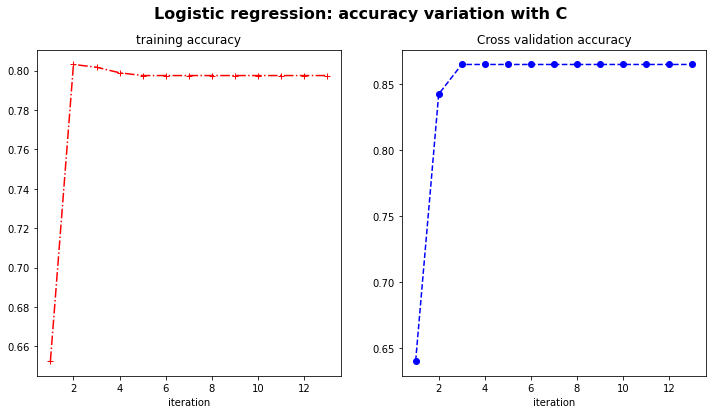

In [273]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax1.plot(iteration, training_accuracy, 'r+-.')
ax1.set(title='training accuracy', xlabel='iteration')

ax2.plot(iteration, cv_accuracy, 'bo--')
ax2.set(title='Cross validation accuracy', xlabel='iteration')

fig.suptitle('Logistic regression: accuracy variation with C', fontsize=16, fontweight='bold');

In [283]:
# by Logistic Regression, accuracy stabilises after 6th iteration i.e. for C = 1000
# measuring accuracy on test set for C = 1000

logreg_final = LogisticRegression(max_iter=1000, C=1000)
logreg_final.fit(X_tr_sc, y_train)

y_test_pr = logreg_final.predict(X_test)
print("Accuracy on test set by Logistic Regression: {:.3f}".format(accuracy_score(y_test, y_test_pr)))

Accuracy on test set by Logistic Regression: 0.764


## Decision tree classifier

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
# iterating over the value of max_depth 

i = 0.01
training_accuracy = []
cv_accuracy = []
iteration = []

for i in range(4,25):
    dtc = DecisionTreeClassifier(max_depth=i, ccp_alpha=0.0025)
    dtc.fit(X_tr_sc, y_train)

    y_tr_pred = dtc.predict(X_tr_sc)
    y_cv_pred = dtc.predict(X_cv)
    
    training_accuracy.append(accuracy_score(y_train, y_tr_pred))
    cv_accuracy.append(accuracy_score(y_cv, y_cv_pred))
    iteration.append(i)

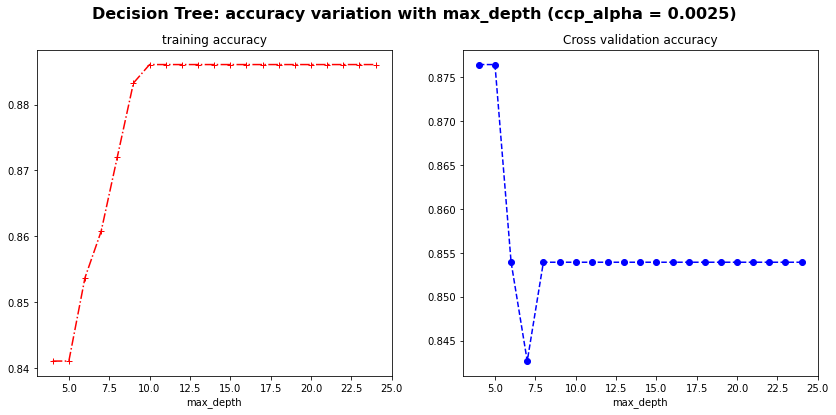

In [261]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
ax3.plot(iteration, training_accuracy, 'r+-.')
ax3.set(title='training accuracy', xlabel='max_depth')

ax4.plot(iteration, cv_accuracy, 'bo--')
ax4.set(title='Cross validation accuracy', xlabel='max_depth')

fig.suptitle('Decision Tree: accuracy variation with max_depth (ccp_alpha = 0.0025)', fontsize=16, fontweight='bold');

In [289]:
# training accuracy and cross validation accuracy are constant after a max_depth of about 10
# measuring accuracy on test set with max_depth=10 and ccp_alpha-0.0025

dtc_final = DecisionTreeClassifier(max_depth=10, ccp_alpha=0.0025)
dtc_final.fit(X_tr_sc, y_train)

y_test_pre = dtc_final.predict(X_test)
print("Accuracy on test set by Decision tree classifier: {:.3f}".format(accuracy_score(y_test, y_test_pre)))

Accuracy on test set by Decision tree classifier: 0.809


## Prediction on test file

In [316]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [317]:
X_pred = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [318]:
X_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [319]:
X_pred['relatives'] = X_pred['SibSp'] + X_pred['Parch']
X_pred.drop(['SibSp', 'Parch'], axis=1, inplace=True)
X_pred.head()

,Pclass,Sex,Age,Fare,Embarked,relatives
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,1
2,2,male,62.0,9.6875,Q,0
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,2


In [320]:
X_pred.isnull().sum()

Pclass        0
Sex           0
Age          86
Fare          1
Embarked      0
relatives     0
dtype: int64

In [321]:
X_pred['Age'].fillna(X_pred['Age'].mean(), inplace=True)
X_pred['Fare'].fillna(X_pred['Fare'].mean(), inplace=True)
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   Embarked   418 non-null    object 
 5   relatives  418 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [322]:
X_pred = pd.get_dummies(data=X_pred, columns=['Sex', 'Embarked'], drop_first=True)
X_pred.head()

,Pclass,Age,Fare,relatives,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1
2,2,62.0,9.6875,0,1,1,0
3,3,27.0,8.6625,0,1,0,1
4,3,22.0,12.2875,2,0,0,1


### prediction using DecisionTreeClassifier

In [348]:
X_pred = scaler.transform(X_pred)

In [349]:
type(X_pred)

numpy.ndarray

In [350]:
predictions = dtc_final.predict(X_pred)

In [352]:
prediction_list = predictions.tolist()
type(prediction_list)

list

In [353]:
Id_list = df_test['PassengerId'].tolist()

In [355]:
prediction_df = pd.DataFrame()

In [356]:
prediction_df['PassengerId'] = Id_list
prediction_df['Survived'] = prediction_list

In [359]:
prediction_df.to_csv('Prediction.csv', index=False)